In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


In [2]:

# Open the binary file
with open('../GW.dat', 'rb') as f:
    # Read the dimensions (ncol, nlev) - Fortran writes integers in 4 bytes by default
    ncol, nlev = np.fromfile(f, dtype=np.int32, count=2)
    print(f"Dimensions read from file: ncol={ncol}, nlev={nlev}")

    # Read array (two dimensions), Fortran order
    zm = np.fromfile(f, dtype=np.float64, count=ncol * nlev).reshape((ncol, nlev), order='F')
    # Read  array (two dimensions), Fortran order
    zi = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')
    
    tau_a = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')
    tau_b = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')

    bwv = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    tlb = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    wbr = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')

    ubmsrc = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    nsrc = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')

    tauoro = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    taudsw = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    
    ubm = np.fromfile(f, dtype=np.float64, count=ncol * (nlev) ).reshape((ncol, nlev), order='F')
    tau = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')
    tau_diag = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')

# 


Dimensions read from file: ncol=48600, nlev=93


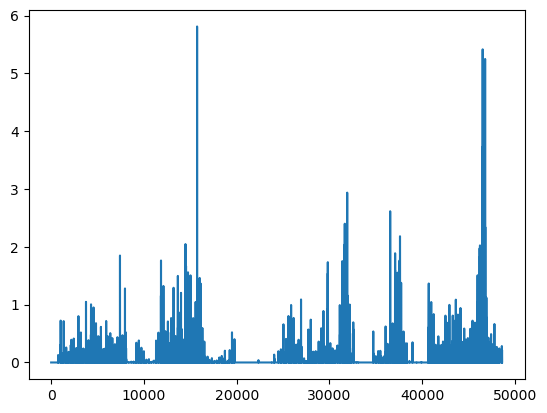

In [3]:
plt.plot( taudsw )

In [4]:
hfile =   '/glade/derecho/scratch/juliob/archive/ndg_Rdg04_c6455g3/atm/hist/ndg_Rdg04_c6455g3.cam.h2i.2014-01-15-00000.nc'
X=xr.open_dataset( hfile )

In [5]:
taudsw_cam = X.TAUDSW1.values
tauoro_cam = X.TAUORO1.values
tau_a_cam = X.TAUM1_DIAG_A.values
tau_b_cam = X.TAUM1_DIAG_B.values
tau_diag_cam = X.TAUM1_DIAG.values
tau_cam=X.TAU1RDGBETAM.values
ubm_cam=X.UBM1BETA.values


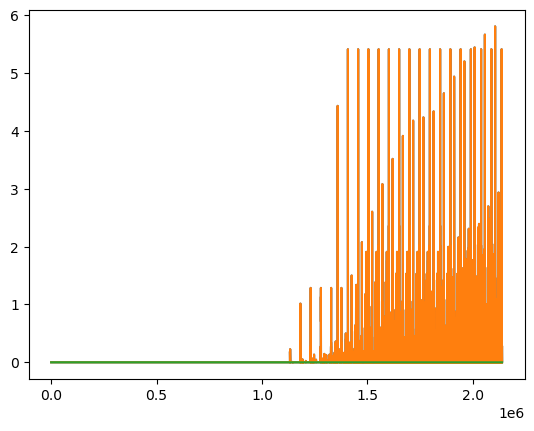

In [6]:
z=np.arange(start=50,stop=94)
plt.plot( tau_a_cam[0,z,:].flatten() )
plt.plot( tau_a.T[z,:].flatten() )
plt.plot( tau_a_cam[0,z,:].flatten() -  tau_a.T[z,:].flatten() )


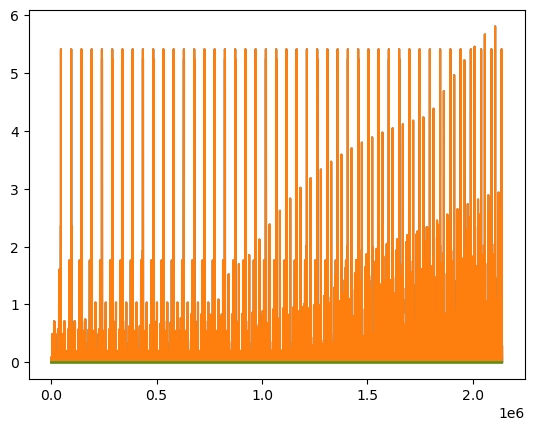

In [7]:
z=np.arange(start=50,stop=94)
plt.plot( tau_diag_cam[0,z,:].flatten() )
plt.plot( tau_diag.T[z,:].flatten() )
plt.plot( tau_diag_cam[0,z,:].flatten() -  tau_diag.T[z,:].flatten() )


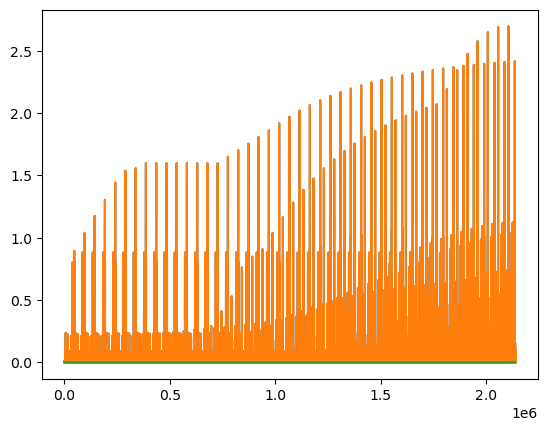

In [8]:
z=np.arange(start=50,stop=94)
plt.plot( tau.T[z,:].flatten() )
plt.plot( tau_cam[0,z,:].flatten() )
plt.plot( tau_cam[0,z,:].flatten() -  tau.T[z,:].flatten() )


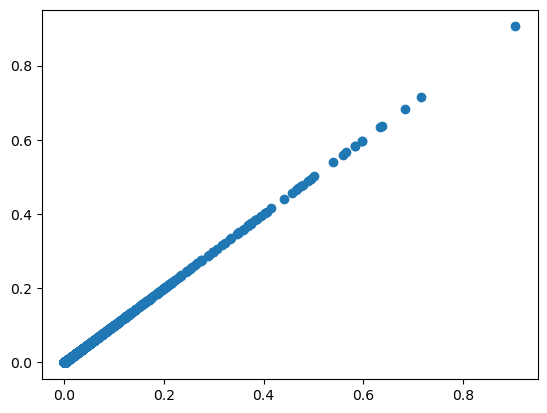

In [9]:
z=40 #np.arange(start=50,stop=94)
plt.scatter( tau_diag_cam[0,z,:].flatten() ,  tau_diag.T[z,:].flatten() )
